In [1]:
import pandas as pd

##Variant 5
# 2, 4, 6, 7, 9, 10, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27

In [35]:
df = pd.read_csv('NationalNames.csv').dropna()

In [36]:
# Task 2
df.tail(8)

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

In [4]:
# Task 4
df.describe()

,Id,Year,Count
count,708268.000000,708268.000000,708268.000000
mean,354134.500000,1936.367717,252.725649
std,204459.504567,22.582218,2047.597817
min,1.000000,1880.000000,5.000000
25%,177067.750000,1920.000000,7.000000
50%,354134.500000,1938.000000,13.000000
75%,531201.250000,1956.000000,38.000000
max,708268.000000,1970.000000,99680.000000


In [45]:
# Task 6
df.drop_duplicates(subset = 'Name').groupby("Gender").count()['Count']

Gender
F    20454
M    10972
Name: Count, dtype: int64

In [43]:
# Task 7
df.query("Gender == 'M' and Year == 1970").sort_values(by=['Count'], ascending=False)[:5]

42931    Mary
Name: Name, dtype: object

In [175]:
# Task 9
df.query(f"Count == {df['Count'].min()}")['Count'].sum()

464400.0

In [44]:
# Task 10
df.groupby('Year')['Name'].count()

AttributeError: ignored

In [179]:
# Task 15
df.groupby('Year')['Count'].sum().to_frame()

,Count
Year,
1880,201484.0
1881,192699.0
1882,221538.0
1883,216950.0
1884,243467.0
...,...
1966,3475832.0
1967,3395291.0
1968,3379031.0


In [180]:
# Task 16
df.groupby('Year')['Count'].sum().to_frame().idxmax()

Count    1957
dtype: int64

In [189]:
# Task 17
df.groupby(['Year', 'Gender'])['Count'].sum().to_frame()

Count
Year Gender           
1880 F         90993.0
     M        110491.0
1881 F         91954.0
     M        100745.0
1882 F        107850.0
...                ...
1968 M       1738928.0
1969 F       1686947.0
     M       1789732.0
1970 F       1748147.0
     M       1833886.0

[182 rows x 1 columns]

In [182]:
# Task 18
year_to_male = df.query('Gender == "M"').groupby('Year')['Count'].sum()
year_to_female = df.query('Gender == "F"').groupby('Year')['Count'].sum()
(year_to_female > year_to_male).sum()

54

In [224]:
# Task 20
male = df.query('Gender == "M"')['Name'].drop_duplicates()
female = df.query('Gender == "F"')['Name'].drop_duplicates()
male.isin(female).sum()

3913

In [184]:
# Task 21
df.query('Name == "Barbara" and Gender == "M"')['Count'].sum()

3863.0

In [185]:
# Task 22
df['Year'].max() - df['Year'].min()

90

In [246]:
# Task 23
male = df.query('Gender == "M"')['Name'].drop_duplicates()
female = df.query('Gender == "F"')['Name'].drop_duplicates()
nosex_names = male[male.isin(female)]
years_count = df.Year.unique().size
df[df.Name.isin(nosex_names)].groupby('Name').filter(lambda d: d['Year'].unique().size == years_count).groupby('Name')['Count'].max().sort_values(ascending=False).to_frame()

,Count
Name,
Linda,99680.0
James,94755.0
Michael,92709.0
Robert,91642.0
John,88318.0
...,...
Bailey,50.0
Nevada,48.0
Lonie,44.0


<AxesSubplot:xlabel='Year'>

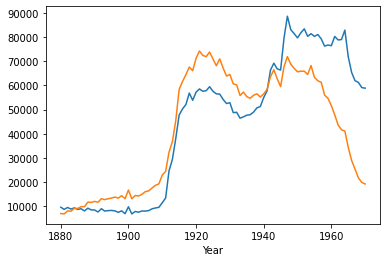

In [187]:
# Task 25
john = df.query('Name == "John"').groupby('Year')['Count'].sum()
mary = df.query('Name == "Mary"').groupby('Year')['Count'].sum()
john.plot()
mary.plot()

<AxesSubplot:xlabel='Year'>

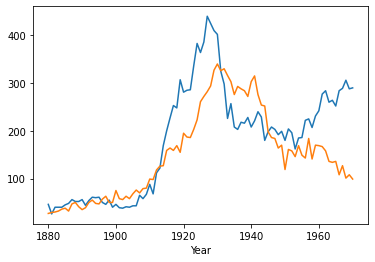

In [188]:
# Task 26
john = df.query('Name == "John" and Gender == "F"').groupby('Year')['Count'].sum()
mary = df.query('Name == "Mary" and Gender == "M"').groupby('Year')['Count'].sum()
john.plot()
mary.plot()

In [216]:
# Task 27
df.groupby(['Year']).apply(lambda d: d[d.Count == d.Count.max()].iloc[0][['Name', 'Count']]).reset_index()

,Year,Name,Count
0,1880,John,9655.0
1,1881,John,8769.0
2,1882,John,9557.0
3,1883,John,8894.0
4,1884,John,9388.0
...,...,...,...
86,1966,Michael,80002.0
87,1967,Michael,82454.0
88,1968,Michael,82019.0
89,1969,Michael,85227.0
